In [46]:
import torch
from torchvision.utils import make_grid
from matplotlib.pyplot import imshow

import codebase.utils as ut
from codebase.models.vae import VAE
from codebase.train import train


In [12]:
iter_max=20000
z = 10
run = 0
layout = [
    ('model={:s}',  'vae'),
    ('z={:02d}',  z),
    ('run={:04d}', run)
]
model_name = '_'.join([t.format(v) for (t, v) in layout])
#pprint(vars(args))
print('Model name:', model_name)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train_loader, labeled_subset, _ = ut.get_mnist_data(device, use_test_subset=True)
vae = VAE(z_dim=z, name=model_name).to(device)


Model name: model=vae_z=10_run=0000


In [13]:
ut.load_model_by_name(vae, global_step=iter_max)

Loaded from checkpoints/model=vae_z=10_run=0000/model-20000.pt


In [15]:

ut.evaluate_lower_bound(vae, labeled_subset, run_iwae=False)

********************************************************************************
LOG-LIKELIHOOD LOWER BOUNDS ON TEST SUBSET
********************************************************************************
NELBO: 99.67083740234375. KL: 19.257720947265625. Rec: 80.41310119628906


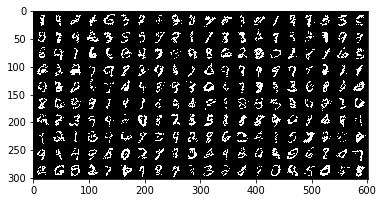

In [66]:
samples = vae.sample_x(200).reshape(200,1,28,28)
grid = make_grid(samples, nrow=20)
#imshow(torch.mean(grid,0))
imshow(grid.permute(1,2,0))


#samples.shape
#imshow(samples.reshape(280,560, order='F'))

In [72]:
x = torch.randn(3,3)
x

tensor([[ 1.5743,  0.0233,  2.2096],
        [-1.4160,  0.4882, -2.3930],
        [ 0.2173,  1.1893, -2.2759]])

In [79]:
x.unsqueeze(1).expand_as(torch.zeros(3,7,3))

tensor([[[ 1.5743,  0.0233,  2.2096],
         [ 1.5743,  0.0233,  2.2096],
         [ 1.5743,  0.0233,  2.2096],
         [ 1.5743,  0.0233,  2.2096],
         [ 1.5743,  0.0233,  2.2096],
         [ 1.5743,  0.0233,  2.2096],
         [ 1.5743,  0.0233,  2.2096]],

        [[-1.4160,  0.4882, -2.3930],
         [-1.4160,  0.4882, -2.3930],
         [-1.4160,  0.4882, -2.3930],
         [-1.4160,  0.4882, -2.3930],
         [-1.4160,  0.4882, -2.3930],
         [-1.4160,  0.4882, -2.3930],
         [-1.4160,  0.4882, -2.3930]],

        [[ 0.2173,  1.1893, -2.2759],
         [ 0.2173,  1.1893, -2.2759],
         [ 0.2173,  1.1893, -2.2759],
         [ 0.2173,  1.1893, -2.2759],
         [ 0.2173,  1.1893, -2.2759],
         [ 0.2173,  1.1893, -2.2759],
         [ 0.2173,  1.1893, -2.2759]]])